In [43]:
def get_dataset(get_examples):
    X1, y1, X2, y2 = get_examples()
    X, y = get_dataset_for(X1, y1, X2, y2)
    return X, y

def get_dataset_for(X1, y1, X2, y2):
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    return X, y



def get_training_examples():
    X1 = np.array([[10,10],[6,6],[6,11],[3,15],[12,6],[9,5],[16,3],[11,5]])
    X2 = np.array([[3,6],[6,3],[2,9],[9,2],[18,1],[1,18],[1,13],[13,1]])

    y1 = np.ones(len(X1))
    y2 = np.ones(len(X2)) * -1
    X0 = [X1,y1,X2,y2]
    return X1, y1, X2, y2

# def get_training_examples():
#     X1 = np.array([[8, 7], [4, 10], [9, 7], [7, 10],
#                    [9, 6], [4, 8], [10, 10]]) 
#     y1 = np.ones(len(X1))
#     X2 = np.array([[2, 7], [8, 3], [7, 5], [4, 4],
#                    [4, 6], [1, 3], [2, 5]])
#     y2 = np.ones(len(X2)) * -1
#     return X1, y1, X2, y2

def get_dataset(get_examples):
    X1, y1, X2, y2 = get_examples()
    X, y = get_dataset_for(X1, y1, X2, y2)
    return X, y




In [44]:
# def get_training_examples():
#     X1 = np.array([[8, 7], [4, 10], [9, 7], [7, 10],
#                    [9, 6], [4, 8], [10, 10]])
#     y1 = np.ones(len(X1))
#     X2 = np.array([[2, 7], [8, 3], [7, 5], [4, 4],
#                    [4, 6], [1, 3], [2, 5]])
#     y2 = np.ones(len(X2)) * -1
#     return X1, y1, X2, y2

# def get_test_examples():
#     X1 = np.array([[2, 9], [1, 10], [1, 11], [3, 9], [11, 5],
#                    [10, 6], [10, 11], [7, 8], [8, 8], [4, 11],
#                    [9, 9], [7, 7], [11, 7], [5, 8], [6, 10]])
#     X2 = np.array([[11, 2], [11, 3], [1, 7], [5, 5], [6, 4],
#                    [9, 4], [2, 6], [9, 3], [7, 4], [7, 2], [4, 5],
#                    [3, 6], [1, 6], [2, 3], [1, 1], [4, 2], [4, 3]])
#     y1 = np.ones(len(X1))
#     y2 = np.ones(len(X2)) * -1
#     return X1, y1, X2, y2


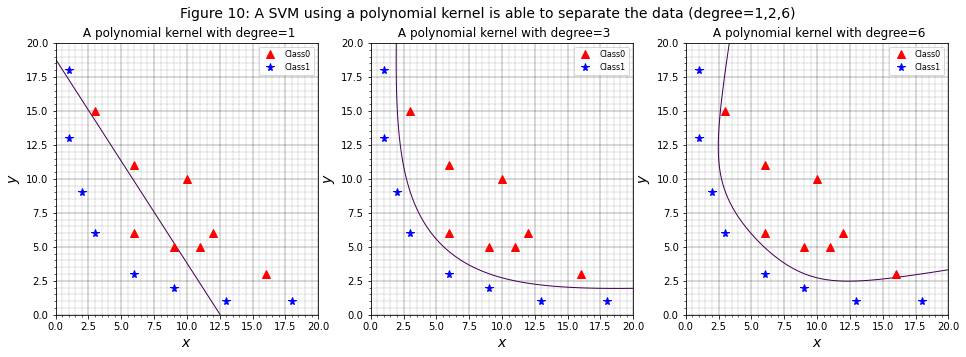

array([[-1.33753301e+00, -1.33753301e+00, -1.33753301e+00, ...,
        -6.10514826e+01, -6.17760113e+01, -6.25078510e+01],
       [-1.33753301e+00, -1.33753301e+00, -1.33753301e+00, ...,
        -6.06581010e+01, -6.13786631e+01, -6.21065042e+01],
       [-1.33753301e+00, -1.33753301e+00, -1.33753301e+00, ...,
        -6.02579345e+01, -6.09744753e+01, -6.16982629e+01],
       ...,
       [-6.10514826e+01, -6.06581010e+01, -6.02579345e+01, ...,
         3.12881345e+03,  3.14775011e+03,  3.16677171e+03],
       [-6.17760113e+01, -6.13786631e+01, -6.09744753e+01, ...,
         3.14775011e+03,  3.16679259e+03,  3.18592044e+03],
       [-6.25078510e+01, -6.21065042e+01, -6.16982628e+01, ...,
         3.16677171e+03,  3.18592044e+03,  3.20515496e+03]])

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# from succinct import get_dataset, non_separable_poly as nsp
# import get_dataset, non_separable_poly as nsp

def polynomial_kernel(a, b, degree, constant=0):
    result = sum([a[i] * b[i] for i in range(len(a))]) + constant
    return pow(result, degree) 

xx, yy = np.meshgrid(np.linspace(0, 20, 500),
                     np.linspace(0, 20, 500))

X_data, y_data = get_dataset(get_training_examples)
# print(X_data)
# print(y_data)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Figure 10: A SVM using a polynomial kernel is able to separate the data (degree=1,2,6)", fontsize=14)

for k,degree in enumerate([1,3,6]):
    d=degree
    ax=plt.subplot(1, 3, k + 1)
    if d==1:
        C=0.5
    elif d>1:
        C=0.1
    # fit the model
    clf = svm.NuSVC(nu=C,kernel='poly',degree=d ,gamma='auto')
    clf.fit(X_data, y_data)
#     print(clf.fit(X_data,y_data))

    a0=X_data[0:8,0]
    b0=X_data[0:8,1]
    c0=X_data[8:16,0]
    d0=X_data[8:16,1]

    plt.plot(a0,b0,"r^",c0,d0,"b*",markersize=8)

    # plot the decision function for each datapoint on the grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
#     print("Z", Z)
#     Z1 = polynomial_kernel(X_data,y_data,d)
#     print("Z1",Z1)
    

    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1,linestyles='-')

    plt.xlabel(r'$x$',fontsize=14)
    plt.ylabel(r'$y$',fontsize=14)
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
    # Customize the minor grid

    plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
    plt.legend(["Class0", "Class1"], loc="upper right",prop=dict(size=8))
    ax.set_title(" A polynomial kernel with degree={}".format(degree))
    
plt.show()

Z


In [46]:
def polynomial_kernel(a, b, degree, constant=0):
    result = sum([a[i] * b[i] for i in range(len(a))]) + constant
    return pow(result, degree) 

In [47]:
x1 = [3,6]
x2 = [10,10]
# We do not transform the data.

polynomial_kernel(x1, x2, degree=2)

8100